In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow --upgrade

In [3]:
!pip install pyngrok==4.1.1
!pip install flask_ngrok

# Importing the required libraries

In [15]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
from flask import Flask, render_template, request, flash, redirect, url_for, send_from_directory
from flask_ngrok import run_with_ngrok
from PIL import Image
import os
from werkzeug.utils import secure_filename

# Loading The Data

In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analyzing The Data

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

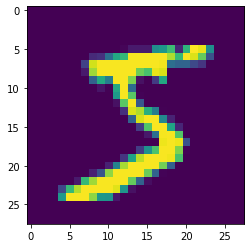

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

# Reshaping The Data

In [10]:
X_train=X_train.reshape(60000,28,28,1).astype('float32')
X_test=X_test.reshape(10000,28,28,1).astype('float32')

# Applying One Hot Encoding

In [11]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Add CNN Layers

In [16]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

# Compiling The Model

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Train The Model

In [18]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 110s 58ms/step - loss: 0.2101 - accuracy: 0.9528 - val_loss: 0.0866 - val_accuracy: 0.9726
Epoch 2/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0673 - accuracy: 0.9795 - val_loss: 0.0869 - val_accuracy: 0.9742
Epoch 3/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.1060 - val_accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.0919 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0950 - val_accuracy: 0.9783


# Observing The Metrics

In [19]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.09504809975624084, 0.9782999753952026]


# Test The Model

In [20]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 91ms/step
[[1.82671718e-14 5.06547403e-23 3.13800726e-17 1.19390725e-14
  3.83110355e-19 2.02494492e-17 7.33572043e-23 1.00000000e+00
  5.17442965e-17 2.80756508e-16]
 [1.12622702e-08 7.62237717e-10 9.99999762e-01 3.42746692e-10
  7.89115680e-14 3.68328889e-15 2.74562268e-07 6.21683934e-17
  5.48640813e-08 6.47457737e-19]
 [3.44165585e-07 9.99130666e-01 8.15750915e-04 5.58505228e-13
  2.00677277e-05 1.13779552e-05 1.16993806e-06 3.12395230e-08
  2.06161421e-05 4.49290822e-12]
 [9.99656081e-01 1.68890187e-21 8.99807429e-09 3.65463588e-16
  2.80997827e-13 1.02395729e-12 3.43891734e-04 4.65381871e-16
  2.50982790e-09 2.60907651e-09]]


In [21]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Observing The Metrics

In [22]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.09504809975624084, 0.9782999753952026]


# Test The Model

In [23]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 27ms/step
[[1.82671718e-14 5.06547403e-23 3.13800726e-17 1.19390725e-14
  3.83110355e-19 2.02494492e-17 7.33572043e-23 1.00000000e+00
  5.17442965e-17 2.80756508e-16]
 [1.12622702e-08 7.62237717e-10 9.99999762e-01 3.42746692e-10
  7.89115680e-14 3.68328889e-15 2.74562268e-07 6.21683934e-17
  5.48640813e-08 6.47457737e-19]
 [3.44165585e-07 9.99130666e-01 8.15750915e-04 5.58505228e-13
  2.00677277e-05 1.13779552e-05 1.16993806e-06 3.12395230e-08
  2.06161421e-05 4.49290822e-12]
 [9.99656081e-01 1.68890187e-21 8.99807429e-09 3.65463588e-16
  2.80997827e-13 1.02395729e-12 3.43891734e-04 4.65381871e-16
  2.50982790e-09 2.60907651e-09]]


In [24]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Save The Model

In [25]:
pwd

'/home/wsuser/work'

In [26]:
model.save('models/mnistCNN.h5')

In [28]:
cd models

/home/wsuser/work/models


In [29]:
!tar -zcvf model_deployement.tgz mnistCNN.h5

mnistCNN.h5


In [30]:
ls -1

ibm_model_digit_recognition_system.tar.gz
mnistCNN.h5
model_deployement.tgz
models/


In [31]:
!pip install watson-machine-learning-client --upgrade

# Cloud Deployement

In [32]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"wNTiv4KCXoPCoOVrkbYfJWizzwQyk-yjX4B5rlh7_WXY"
}
client = APIClient(credentials)
client

In [33]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/8671ad5b693f4e0e91989f61e343a278:2d652024-1e95-4257-976f-5c0a640ee6ff::',
      'guid': '2d652024-1e95-4257-976f-5c0a640ee6ff',
      'name': 'Watson Machine Learning-mq',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'handwrittenDigitRecognitionSystem',
    'scope': {'bss_account_id': '8671ad5b693f4e0e91989f61e343a278'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'f676f873-8431-4221-a16e-a4d8c4a6d312',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '8c2452ee0cb14af997bee33e349c8469',
        'api_key': '5_np7BzAZ6hQ995hzTShChD3O9Tz_T_rO0q_FXfJC0sq',
        'secret_access_key': '39b1795e7fad16166741d1756b96a70a84ad5d749b9c5d5d',
        'service_id': 'ServiceId-de00e87f-28ff-4043-9bb5-071603d9993c'},
       'editor': {'access_key_id': 'c96002ce42f241d4bc7978bcdc55d5

In [36]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [37]:
space_uid = guid_from_space_name(client,'handwrittenDigitRecognitionSystem')
print("Space UID = " + space_uid)

Space UID = bb150f46-9672-46c6-b119-4a67d9b7b45a


In [38]:
client.set.default_space(space_uid)

'SUCCESS'

In [39]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [40]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='model_deployement.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})
model_details

In [60]:
model_id = client.repository.get_model_id(model_details)
model_id

'5bdb9e0b-6078-4d36-9bf5-7d27a3820203'

In [33]:
# TEST THE SAVED MODEL

In [36]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wQKmhmpjTMXKglIMyZyWQNVJIxWnSShnGkdHLkmUHK3G',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognitionsystem-donotdelete-pr-inrz2p8h2ezjmm'
object_key = 'sample.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [37]:
    img=Image.open(streaming_body_1).convert("L")
    img=img.resize((28,28))
    im2arr=np.array(img)
    im2arr=im2arr.reshape(1,28,28,1)
    y_pred=model.predict(im2arr)
    print(y_pred)

NameError: name 'model' is not defined

In [63]:
print(np.argmax(y_pred, axis=1))

[7]


# Test With Saved Model

In [6]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wQKmhmpjTMXKglIMyZyWQNVJIxWnSShnGkdHLkmUHK3G',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognitionsystem-donotdelete-pr-inrz2p8h2ezjmm'
object_key = 'static.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [8]:
pwd

'/home/wsuser/work'